<a href="https://colab.research.google.com/github/jsansao/dlvc/blob/main/Licao5_FashionMNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

Esse notebook foi adaptado de https://github.com/lmoroney/dlaicourse



In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.


# Melhorando a acúracia usando Convoluções 

Na lição 3, podemos verificar o desempenho das redes neurais profundas (DNN) com 3 camadas (camada de entrada, camada de saída e camada oculta). 

Experimentamos com diferentes parâmetros para verificar o desempenho da rede neural para esse conjunto de dados (Fashion MNIST). 

Abaixo, o código básico da lição para comparação. 



In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images / 255.0
test_images=test_images / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

test_loss = model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5032 - accuracy: 0.8245
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3752 - accuracy: 0.8633
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3381 - accuracy: 0.8761
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3132 - accuracy: 0.8852
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3759 - accuracy: 0.8677


Note que acúracia de treinamento está na faixa dos 89% e acurácia de validação na faixa de 87%. 

Com adição de camadas de convolução e pooling antes das camadas densas, formamos a chamada CNN (convolutional neural network). 

Pelas características de realçamento dos filtros convolucionais, a adição destas camadas tem o potencial de aumentar a acúracia dos classificadores, como veremos a seguir. 

No trecho a seguir, adicionou-se 2 camadas convolucionais na rede. Compare a acúracia com a rede anterior (totalmente conectada). 

Para acelerar o processamento, considere alterar o runtime do ambiente para GPU (veja em Runtime/Change Runtime Type/ Hardware Accelerator/GPU).
  

In [ ]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)


2.6.0
4431872/4422102 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_____________________________________________________

In [ ]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images2=training_images.reshape(60000, 28, 28, 1)



print(training_images.shape)
print(training_images2.shape)


(60000, 28, 28)
(60000, 28, 28, 1)


Note que a acúracia sobe para 93% no conjunto de treinamento e 91% no conjunto de testes. 

Tente agora rodar por mais épocas (~20), repare o aumento da acúracia de treinamento mas o mesmo não ocorre para a validação. Esse é o fenômeno do *overfitting*.

*Overfitting* ocorre quando a rede se especializa excessivamente no conjunto de treinamento, ficando menos efetiva para outros conjuntos de dados. 


In [26]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=20)
test_loss = model.evaluate(test_images, test_labels)


2.6.0
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_11 (Dense)             (None, 10)         


Note que o primeiro passo é transformar os dados de entrada em um tensor. Originalmente, tem-se uma lista de 60000 itens com 28x28x1, passa-se a um tensor 60000x28x28x1. 

O passo é necessário para o uso da camada de convolução. 

```
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
```


Próximo passo é definir o modelo. 

Na camada inicial convolucional:

1. O número de convoluções da primeira camada é puramente arbitrário. Um bom palpite inicial é 32. 

2. Tamanho da matriz de convolução (por exemplo 3x3)

3. Função de ativação (neste caso reLu)

4. Formato de entrada: neste caso (28,28,1), imagens 28x28 em tons de cinza (uma dimensão)

O próximo passo é seguir a camada de convolução por uma camada de "MaxPooling", que tem como objetivo comprimir a imagem filtrada, isto é, diminuir o número de parâmetros entre uma etapa e outra. 

Ao especificar  (2,2) no Pooling, o tamanho vai para um quarto do original. Dividindo a imagem total em arranjos 2x2 de pixels, o método escolhe 1 dos 4 pixels, o de maior módulo. 

O comando ``model.summary()`` descreve o tamanho e forma da rede neural. A cada camada de pooling, o tamanho da imagem é reduzido. 


```
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
```


Adicionando mais uma camada de convulação/pooling


```
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2)
```


Achatando a saída, para se ter o mesmo tipo de saída da rede convencional

```
  tf.keras.layers.Flatten(),
```




Aqui, colocou-se 128 neurônios na camada densa e 10 neurônios na camada de saída. 


```
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
```




Finalmente a compilação, treinamento e avaliação do modelo. 


```
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)
```


# Visualizing the Convolutions and Pooling

This code will show us the convolutions graphically. The print (test_labels[;100]) shows us the first 100 labels in the test set, and you can see that the ones at index 0, index 23 and index 28 are all the same value (9). They're all shoes. Let's take a look at the result of running the convolution on each, and you'll begin to see common features between them emerge. Now, when the DNN is training on that data, it's working with a lot less, and it's perhaps finding a commonality between shoes based on this convolution/pooling combination.

In [ ]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


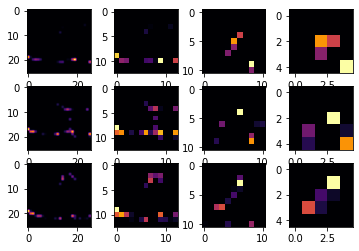

In [21]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
#0,23,28 - bota
#2,3,5 - calça
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

## Exercícios exploratórios


1. Varie o número de convoluções. Mude N=32 para 16 ou 64. Qual é o impacto na acurácia e tempo de treinamento?

N=32


In [27]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),  
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.6.0
Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4688 - accuracy: 0.8294
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3166 - accuracy: 0.8836
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2705 - accuracy: 0.9004
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2416 - accuracy: 0.9105
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2192 - accuracy: 0.9173
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2000 - accuracy: 0.9265
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1808 - accuracy: 0.9320
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1638 - accuracy: 0.9384
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1485 - accuracy: 0.9447
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0

N=16

In [29]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),  
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.6.0
Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5087 - accuracy: 0.8153
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3539 - accuracy: 0.8698
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3102 - accuracy: 0.8857
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2814 - accuracy: 0.8960
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2573 - accuracy: 0.9047
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2395 - accuracy: 0.9105
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2249 - accuracy: 0.9154
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2104 - accuracy: 0.9213
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1971 - accuracy: 0.9264
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0

N=64

In [28]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),  
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.6.0
Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4375 - accuracy: 0.8401
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2884 - accuracy: 0.8948
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2430 - accuracy: 0.9096
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2143 - accuracy: 0.9205
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1857 - accuracy: 0.9312
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1643 - accuracy: 0.9389
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1436 - accuracy: 0.9468
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1260 - accuracy: 0.9528
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1093 - accuracy: 0.9589
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0


2. Remova a última convolução. Qual é o impacto?



In [30]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  #tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  #tf.keras.layers.MaxPooling2D(2,2),  
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.6.0
Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3934 - accuracy: 0.8601
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2695 - accuracy: 0.9028
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2272 - accuracy: 0.9160
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1924 - accuracy: 0.9284
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1665 - accuracy: 0.9388
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1421 - accuracy: 0.9477
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1219 - accuracy: 0.9545
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1033 - accuracy: 0.9616
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0881 - accuracy: 0.9682
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0


3. Adicione mais uma camada convolucional. Qual é o impacto?


In [31]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),  
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),  
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.6.0
Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6282 - accuracy: 0.7709
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4314 - accuracy: 0.8416
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3803 - accuracy: 0.8607
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3462 - accuracy: 0.8723
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3201 - accuracy: 0.8827
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3004 - accuracy: 0.8889
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2830 - accuracy: 0.8956
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2681 - accuracy: 0.9005
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2576 - accuracy: 0.9041
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0


4. Implemente o callback para interromper o treinamento com um determinado nível de acurácia ou perda. 

In [33]:
import tensorflow as tf
print(tf.__version__)


class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nAtingiu loss < 0.4, cancelando treinamento")
      self.model.stop_training = True

callbacks = myCallback()

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),  
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.6.0
Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5359 - accuracy: 0.8053
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3562 - accuracy: 0.8720

Atingiu loss < 0.4, cancelando treinamento
313/313 [==============================] - 1s 2ms/step - loss: 0.3492 - accuracy: 0.8740
0.8740000128746033
